In [1]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

# Utils

In [2]:
# generate random non-zero entries from [-10, -1] and [1, 10]
def generate_sparse_vector(N, s):
    x = np.zeros(N)
    non_zero_indices = np.random.choice(N, s, replace=False)
    for i in non_zero_indices:
        if np.random.rand() < 0.5:  # fifty-fifty chance to be positive or negative
            x[i] = np.random.uniform(-10, -1)
        else:
            x[i] = np.random.uniform(1, 10)
    return x

def generate_A_and_x(M, N, s):
    A = np.random.randn(M, N)
    A = A / np.sqrt(np.sum(A**2, axis=0))
    x = generate_sparse_vector(N, s)
    return A, x

def calculate_normalized_error(x, x_hat):
    return np.linalg.norm(x - x_hat) / np.linalg.norm(x)

# Noiseless case: (n = 0)

In [3]:
def omp(A, y, s):
    # initialize
    residual = y
    index_set = []
    x = np.zeros(A.shape[1])

    for _ in range(s):
        # find the most correlated column
        idx = np.argmax(np.abs(A.T @ residual))
        index_set.append(idx)
        
        # update the solution
        A_selected = A[:, index_set]
        x_temp = np.linalg.lstsq(A_selected, y, rcond=None)[0]  # least square solution
        
        # update the residual
        residual = y - A_selected @ x_temp
        
        # if the residual is small enough, break
        if np.linalg.norm(residual) < 1e-3:
            break
    
    for i, idx in enumerate(index_set):
        x[idx] = x_temp[i]
    
    return x

def experiment_trial(M, N, s_max, num_trials):
    success_count = 0
    total_normalized_error = 0
    for _ in range(num_trials):
        A, x = generate_A_and_x(M, N, s_max)
        y = A @ x
        
        x_hat = omp(A, y, s_max)
        
        # Check if the support of x is exactly recovered
        if set(np.nonzero(x)[0]) == set(np.nonzero(x_hat)[0]):
            success_count += 1
        
        # Calculate the normalized error
        total_normalized_error += calculate_normalized_error(x, x_hat)
    
    return success_count / num_trials, total_normalized_error / num_trials

def experiment(N, s_max, M_values, num_trials=2000):
    success_rates = []
    normalized_errors = []
    
    with ProcessPoolExecutor() as executor:
        futures = [executor.submit(experiment_trial, M, N, s_max, num_trials) for M in M_values]
        for future in futures:
            success_rate, average_normalized_error = future.result()
            success_rates.append(success_rate)
            normalized_errors.append(average_normalized_error)
    
    return success_rates, normalized_errors

s_max=1
success_rates=[0.05, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.343502884254399, 1.8852727477147005e-16, 1.9989991093596596e-16, 1.9333344767323398e-16, 2.0185160378621357e-16, 2.0184507681599531e-16, 1.9827357512886313e-16, 1.887148759981932e-16, 2.0244309132564903e-16, 2.0295353615130083e-16]
s_max=2
success_rates=[0.0, 0.0015, 0.0565, 0.246, 0.4235, 0.617, 0.7375, 0.822, 0.877, 0.9125],
 errors=[1.3447007949955756, 1.276595884348837, 1.076429887552151, 0.8202623263903799, 0.6084696381271673, 0.4121037110661091, 0.2727793330107016, 0.19260007581969912, 0.1338529809039483, 0.09242768587894472]
s_max=3
success_rates=[0.0, 0.0, 0.0, 0.0065, 0.0585, 0.156, 0.3225, 0.46, 0.585, 0.7065],
 errors=[1.3388583693755758, 1.3032843684982498, 1.2136723565674874, 1.1174151944606165, 0.9599442799955396, 0.8271503433077779, 0.6424065595654846, 0.4976758972212612, 0.38110981692387685, 0.26973150967880133]
s_max=4
success_rates=[0.0, 0.0, 0.0, 0.0005, 0.0035, 0.0205, 0.0735, 0.16

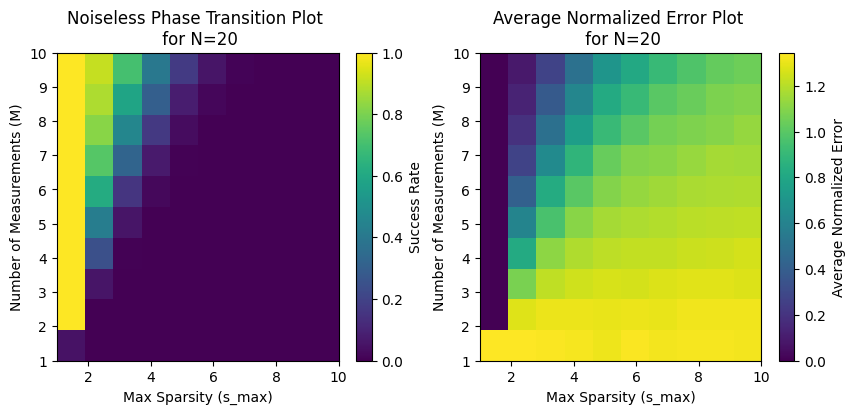

s_max=1
success_rates=[0.0185, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.3880506114691449, 1.8603027152984576e-16, 2.0049598125396187e-16, 1.9583885210600586e-16, 2.027953991849005e-16, 1.979841536912699e-16, 2.011876550388139e-16, 1.9825124590602138e-16, 2.0649496584309023e-16, 1.977468372256675e-16, 1.995364299027125e-16, 2.0263582508169334e-16, 1.9582340118947115e-16, 2.0420854254475707e-16, 1.9891461857893696e-16, 1.978324541949591e-16, 1.994694151711949e-16, 2.0426357040463044e-16, 1.9635353160175787e-16, 1.9564036901406965e-16, 2.0028988400560983e-16, 2.010703731940056e-16, 1.991104498522412e-16, 1.9767272049457728e-16, 2.0609070101567534e-16]
s_max=2
success_rates=[0.0, 0.0, 0.012, 0.091, 0.245, 0.427, 0.594, 0.6965, 0.781, 0.8395, 0.8815, 0.9195, 0.9365, 0.957, 0.9655, 0.975, 0.9795, 0.9885, 0.9905, 0.9935, 0.997, 0.9955, 0.998, 0.997, 0.998],
 errors=[1.3641084126373646, 1.349950553040219

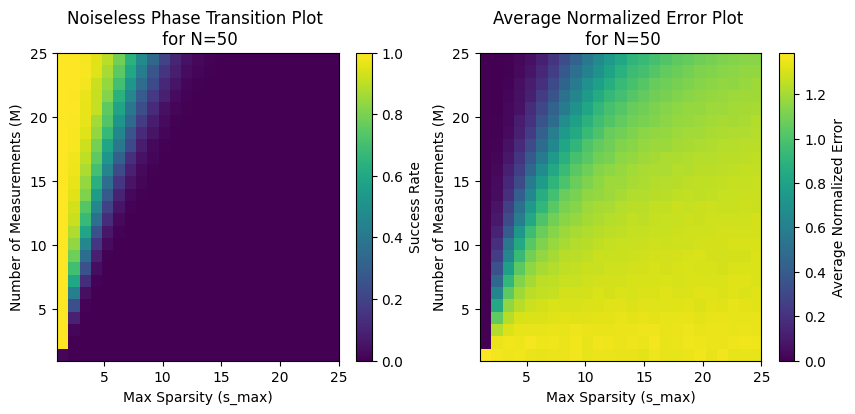

s_max=1
success_rates=[0.008, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.40289985387406, 1.8922273880917857e-16, 1.9785621023618724e-16, 1.9647396082240492e-16, 1.964132672875341e-16, 1.95146416900158e-16, 1.9666539850841235e-16, 1.9278239537133461e-16, 1.993030986267054e-16, 2.044082244523255e-16, 2.010466224232268e-16, 1.9922579363555524e-16, 2.0455789402074547e-16, 2.0296982038844426e-16, 1.996087480936391e-16, 1.9672423470458608e-16, 2.0223948163958443e-16, 2.0240957248303722e-16, 2.0738168272013023e-16, 1.9669658394857024e-16, 2.0822112388562869e-16, 2.065322353899623e-16, 1.9960494046584532e-16, 1.980109764264614e-16, 2.0690767061387323e-16, 2.0806179334632182e-16, 2.055424889970524e-16, 1.995004330457547e-16, 2.0318616756184704e-16, 2.0208492262916436e-16, 1.9755037624

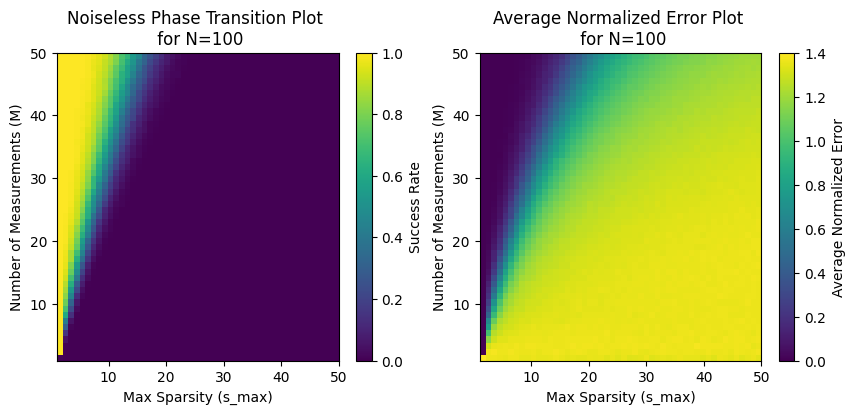

In [4]:
N_values = [20, 50, 100]

for N in N_values:
    # Experiment settings
    M_values = np.arange(1, int(N / 2) + 1)
    s_max_values = np.arange(1, int(N / 2) + 1)

    # Results
    s_all_success_rates = []
    s_all_errors = []

    # Run the experiment
    for s_max in s_max_values:
        success_rates, errors = experiment(N, s_max, M_values)
        print(f's_max={s_max}')
        print(f'success_rates={success_rates},\n errors={errors}')
        s_all_success_rates.append(success_rates)
        s_all_errors.append(errors)

    # Plot the results for success rates
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(s_all_success_rates), extent=[s_max_values[0], s_max_values[-1], M_values[0], M_values[-1]], origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label='Success Rate')
    plt.xlabel('Max Sparsity (s_max)')
    plt.ylabel('Number of Measurements (M)')
    plt.title('Noiseless Phase Transition Plot \n for N={}'.format(N))

    # Plot the results for average normalized errors
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(s_all_errors), extent=[s_max_values[0], s_max_values[-1], M_values[0], M_values[-1]], origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label='Average Normalized Error')
    plt.xlabel('Max Sparsity (s_max)')
    plt.ylabel('Number of Measurements (M)')
    plt.title('Average Normalized Error Plot \n for N={}'.format(N))
    
    plt.show()